## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 12
---------------------------------------

GOALS:

1. Talk about Ethics of Web Scraping
2. Practice web scraping.

----------------------------------------------------------

This homework has **3 questions**, **1 exercise** and **1 optional challenge problem**.

## Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours: Duke 209 <a href="https://joannabieri.com/schedule.html"> Click Here for Joanna's Schedule</a>

## Announcements

**In NEXT WEEK - Data Ethics** This week you should be reading your book or articles.

## Day 12 Assignment - same drill.

1. Make sure you can **Fork** and **Clone** the Day12 repo from [Redlands-DATA101](https://github.com/Redlands-DATA101)
2. Open the file Day12-HW.ipynb and start doing the problems.
    * You can do these problems as you follow along with the lecture notes and video.
3. Get as far as you can before class.
4. Submit what you have so far **Commit** and **Push** to Git.
5. Take the daily check in quiz on **Canvas**.
7. Come to class with lots of questions!

------------------------------
---------------------

### Web Scraping Ethical Issues

There are some things to be aware of before you start scraping data from the web. 

- Some data is private or protected. Just because you have access to a websites data doesn't mean you are allowed to scrape it. For example, when you log into Facebook or another social media site, you are granted special access to data about your connected people. It is unethical to use that access to scrape their private data!

- Some websites have rules against scraping and will cut of service to users who are clearly scraping data. How do they know? Webscrapers access the website very differently that regular users. If they site has a policy about scraping data then you should follow it and/or content them about getting the data if you have a true academic interest in the data.

- The line between web scraping and plagiarism can be very blurry. Make sure that you are citing where your data comes from AND not just reproducing the data exactly. Always citing the source of your data and make sure you are doing something new with it.

- Ethics are different depending on if you are using the data for a personal project (eg. you just want to check scores for your favorite team daily and print the stuff you care about) vs if you are using the project for your business or website (eg. publishing information to drive clicks to your site/video/account or making money from the data you collect). In the later case it is EXTRA important to respect the original owner of the data. Drive web traffic back to their site, check with them about using their data, etc.

**The Ethical Scraper** (from https://towardsdatascience.com/ethics-in-web-scraping-b96b18136f01):

I, the web scraper will live by the following principles:

- If you have a public API that provides the data I’m looking for, I’ll use it and avoid scraping all together.
- I will always provide a User Agent string that makes my intentions clear and provides a way for you to contact me with questions or concerns.
- I will request data at a reasonable rate. I will strive to never be confused for a DDoS attack.
- I will only save the data I absolutely need from your page. If all I need it OpenGraph meta-data, that’s all I’ll keep.
- I will respect any content I do keep. I’ll never pass it off as my own.
- I will look for ways to return value to you. Maybe I can drive some (real) traffic to your site or credit you in an article or post.
- I will respond in a timely fashion to your outreach and work with you towards a resolution.
- I will scrape for the purpose of creating new value from the data, not to duplicate it.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Using pandas to get table data.

**Optional** - try using pandas to scrape a new site. See if you get errors or are able to find tables on that site.


---
---

## Using Beautiful Soup to get HTML code

### How to get data from static sites:

You should already have the packages bs4 and requests but if you get an error try running:

```{python}
!conda install -y bs4
!conda install -y requests
```

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
website = 'https://www.scrapethissite.com/pages/simple/'

In [4]:
raw_code = requests.get(website)
html_doc = raw_code.text
soup = BeautifulSoup(html_doc, 'html.parser')

#### Lets see what is in soup

**Q1** Uncomment this line and run the cell. You will see a TON of text!

In [5]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping</title>
<link href="/static/images/scraper-icon.png" rel="icon" type="image/png"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="A single page that lists information about all the countries in the world. Good for those just get started with web scraping." name="description"/>
<link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css?family=Lato:400,700" rel="stylesheet" type="text/css"/>
<link href="/static/css/styles.css" rel="stylesheet" type="text/css"/>
<meta content="noindex" name="robots"/>
<link h

### Extracting data from HTML:

We will use the **soup.find_all()** function.

Here is the simplified function signature:

    soup.find_all(name=None,attrs={})
    
You can type soup.find_all? and run it to see all the information about additional arguments and advanced processes.

**Here is how we will mostly use it**, but there are much more advanced things you can do:

    soup.find_all( <type of section>, <info> )
    
The **.find_all()** function searches through the information in soup to match and return only sections that match the info. Here are some important types you might search for:

- 'h2' - this is a heading
- 'div' - this divides a block of information
- 'span' - this divides inline information
- 'a' - this specifies a hyperlink
- 'li' - this is a list item

- class_= - many things have the class label (notice the underscore!)
- string= - you can also search by strings.


### Using Developer tools:

To figure out what data to extract I suggest you use developer tools on the website to find what you need. 

**Q2** Navigate to the website and use developer tools to explore the html code.

[Scrape This Site -  Website](https://www.scrapethissite.com/pages/simple/)

I really like Brave Browser or Google Chrome for this, but most browsers with have **More Tools/Developer Tools** where you can see the code.

### Search for all the country names

The names of the country are inside 
        
        <h3 class="country-name">

So lets search for this:

In [6]:
result = soup.find_all('span',class_="country-capital")

In [7]:
result[0]

<span class="country-capital">Andorra la Vella</span>

In [8]:
result[0].text

'Andorra la Vella'

In [49]:
# Create a data frame and add the site names
DF = pd.DataFrame()
DF['capital']=result
DF['capital'] = DF['capital'].apply(lambda x: x.text)
DF

,capital
0,Andorra la Vella
1,Abu Dhabi
2,Kabul
3,St. John's
4,The Valley
...,...
245,Sanaa
246,Mamoudzou
247,Pretoria
248,Lusaka


aFrame(data)

# Display the DataFrame
print(df)
Your turn to try this!

**Q3** Now it's your turn. See if you can write code that gets the population and area information into the data frame. See if you can make your example match what I get below, including having the correct data types. Population should be an int and area should be a float.

Your goal is to get a data frame that looks like the one in lecture with columns for country, capital, population, and area!

In [6]:
raw_code = requests.get(website)
html_doc = raw_code.text

soup = BeautifulSoup(html_doc, 'html.parser')

countries = soup.find_all('h3', class_='country-name')
capitals = soup.find_all('span', class_='country-capital')
populations = soup.find_all('span', class_='country-population')
areas = soup.find_all('span', class_='country-area')

country_list = [country.text for country in countries]
capital_list = [capital.text for capital in capitals]
population_list = [int(pop.text.replace(',', '')) for pop in populations]  
area_list = [float(area.text.replace(' km²', '').replace(',', '')) for area in areas]  

df = pd.DataFrame({
    'country': country_list,
    'capital': capital_list,
    'population': population_list,
    'area': area_list
})

show(df)


### Where can you get more practice

Here is a website dedicated to allowing students to practice webscraping:

[www.scrapethissite.com](https://www.scrapethissite.com/pages/)

    website=https://www.scrapethissite.com/pages/
-----------------
### Exercise 1:

We are going to scrape the site above to get the list of all links. 

Open the website and look at the developer tools.

Here is our goal: Make a pandas data frame that contains three columns: 

* "site_name" - which contains just the words of the link
* "link" - which contains just the website part of the link
* "description" - which contains the words below the link

When looking for links you can use

    result = soup.find_all('a')
    result[0].text # Get the text associated with the link
    result[0].get('href') # Get the link location



See if you can do this without looking at my code in the notes! What would your plan have to be?

**See the lecture notes for hints and the solution!**


In [11]:
website = 'https://www.scrapethissite.com/pages/'
raw_code = requests.get(website)
html_doc = raw_code.text
soup = BeautifulSoup(html_doc, 'html.parser')

result = soup.find_all('a')

DF = pd.DataFrame()
DF['site_name'] = [link.text.strip() for link in result[5:]]
DF['link'] = [f"https://www.scrapethissite.com{link.get('href')}" for link in result[5:]]
DF['description'] = [desc.text.strip() for desc in soup.find_all('p', class_="lead session-desc")]

DF = DF.dropna()
DF

,site_name,link,description
0,Countries of the World: A Simple Example,https://www.scrapethissite.com/pages/simple/,A single page that lists information about all...
1,"Hockey Teams: Forms, Searching and Pagination",https://www.scrapethissite.com/pages/forms/,Browse through a database of NHL team stats si...
2,Oscar Winning Films: AJAX and Javascript,https://www.scrapethissite.com/pages/ajax-java...,Click through a bunch of great films. Learn ho...
3,Turtles All the Way Down: Frames & iFrames,https://www.scrapethissite.com/pages/frames/,Some older sites might still use frames to bre...
4,Advanced Topics: Real World Challenges You'll ...,https://www.scrapethissite.com/pages/advanced/,"Scraping real websites, you're likely run into..."


### Challenge Problem

Here is another website to scrape. See if you can create a data frame that looks like the one in the lecture notes. Notice that you can only scrape the first page with the first link. 

If you want to try scraping the other pages you have to notice how the website updates its address for each page. Then write a for loop to loop through how ever many pages you want to scrape. Do the same set of operations for each page keep adding data to your data frame.

Make a histogram of your final data.

In [11]:
website='https://books.toscrape.com/index.html'
raw_code = requests.get(website)
html_doc = raw_code.text
soup = BeautifulSoup(html_doc, 'html.parser')

**Try to scrape the name, the link to the book, and the prices! I decided to put the name and link information into a single column and then break that apart**

                                                 name  \
0                                A Light in the Attic   
1                                  Tipping the Velvet   
2                                          Soumission   
3                                       Sharp Objects   
4               Sapiens: A Brief History of Humankind   
..                                                ...   
95  Lumberjanes Vol. 3: A Terrible Plan (Lumberjan...   
96  Layered: Baking, Building, and Styling Spectac...   
97  Judo: Seven Steps to Black Belt (an Introducto...   
98                                               Join   
99          In the Country We Love: My Family Divided   

                                                 link  price  
0   https://books.toscrape.com/catalogue/a-light-i...  51.77  
1   https://books.toscrape.com/catalogue/tipping-t...  53.74  
2   https://books.toscrape.com/catalogue/soumissio...  50.10  
3   https://books.toscrape.com/catalogue/sharp-obj...  47.82  


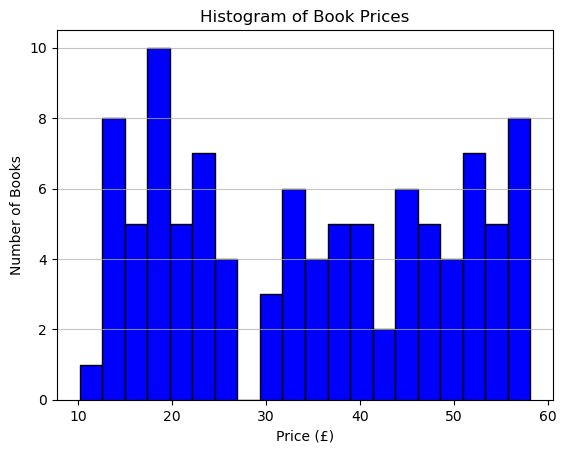

In [16]:
def scrape_books(base_url, pages):
    all_data = []
    
    for page in range(1, pages + 1):
        url = base_url.format(page)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        for book in soup.find_all('article', class_='product_pod'):
            name = book.h3.a['title']
            link = f"https://books.toscrape.com/catalogue/{book.h3.a['href']}"
            price = float(re.sub(r'[^\d.]', '', book.find('p', class_='price_color').text))
            all_data.append({'name': name, 'link': link, 'price': price})
    
    return pd.DataFrame(all_data)

base_url = 'https://books.toscrape.com/catalogue/page-{}.html'
df = scrape_books(base_url, 5)
print(df)

plt.hist(df['price'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Number of Books')
plt.grid(axis='y', alpha=0.75)
plt.show()

